## PROJEKT NR 3 MACHINE LEARNING
### TEMAT 7: ESTYMACJA NIEWYDOLNOŚCI SERCA
<br>
<span style="color:blue"> ZESPÓŁ WORLD-DATA-ANALYSIS </span> <br>
JONASZ KRAWCZYK, ANGELIKA POPIELA, BŁAŻEJ RATMAN, HUBERT STADNICKI

### Exploratory Data Analysis

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


%matplotlib inline

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
4,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
280,70.0,0,2695,1,40,0,241000.0,1.0,137,1,0,247,0
129,53.0,1,270,1,35,0,227000.0,3.4,145,1,0,105,0
51,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
171,52.0,0,3966,0,40,0,325000.0,0.9,140,1,1,146,0
96,63.0,1,514,1,25,1,254000.0,1.3,134,1,0,83,0
10,75.0,1,81,0,38,1,368000.0,4.0,131,1,1,10,1
125,43.0,1,358,0,50,0,237000.0,1.3,135,0,0,97,0
187,60.0,0,1896,1,25,0,365000.0,2.1,144,0,0,172,1
111,55.0,0,60,0,35,0,228000.0,1.2,135,1,1,90,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


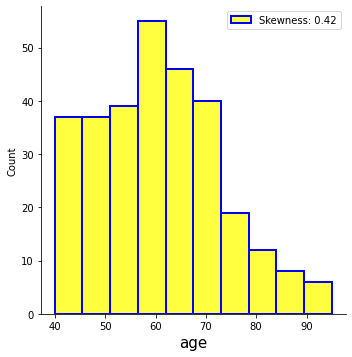

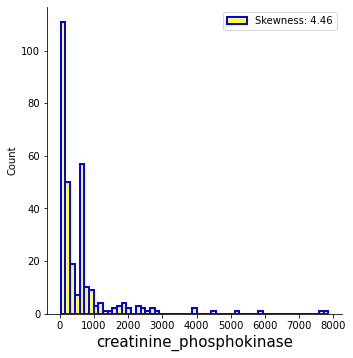

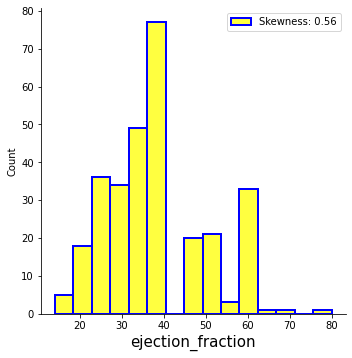

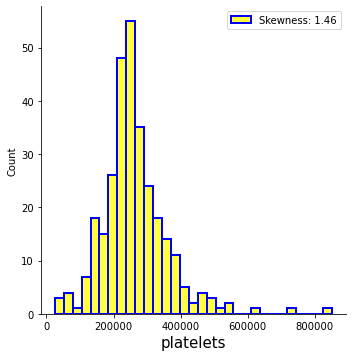

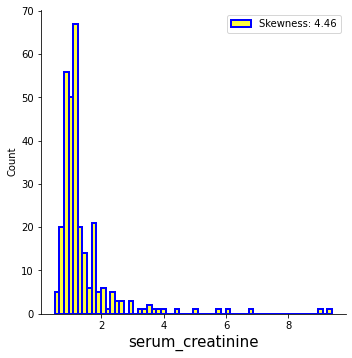

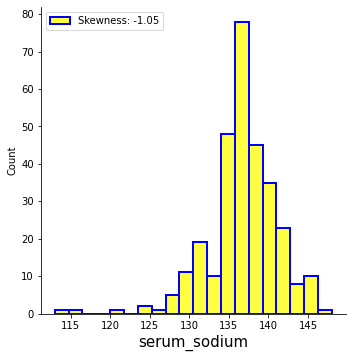

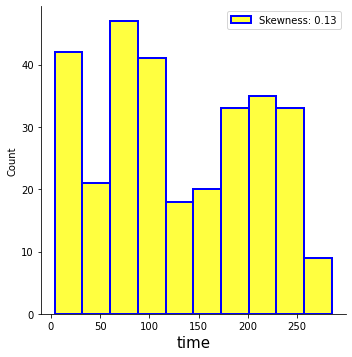

In [37]:
columns = df.drop(columns= ['anaemia','diabetes', 'high_blood_pressure', 'sex', 'smoking','DEATH_EVENT'])

for col in columns:
    sns.displot(columns[col], color='yellow',edgecolor="blue", linewidth = 2, label = 'Skewness: %.2f'%(columns[col].skew()))
    plt.legend(loc = 'best')
    plt.xlabel(xlabel = col, fontsize=15)

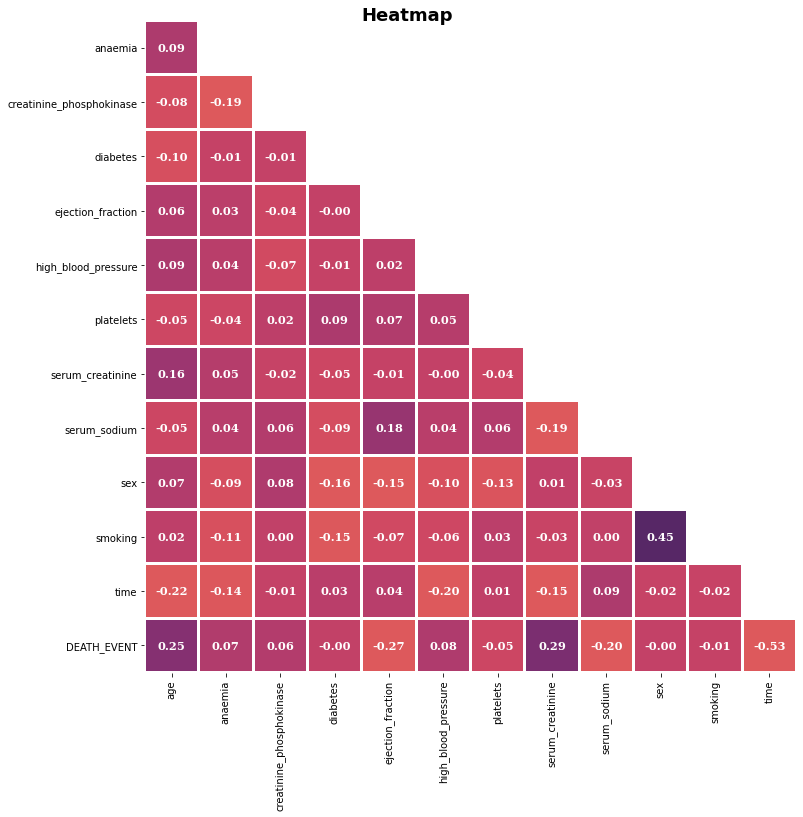

In [38]:
df_corr = df.corr()
mask = np.triu(np.ones_like(df_corr))

mask = mask[1:, :-1]

corr = df_corr.iloc[1:,:-1].copy()

plt.figure(figsize=(18,12))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap = 'flare', center = 0, vmin=-0.15, vmax=0.5, cbar = False, linewidth = 2, square = True, annot_kws = {'font':'serif', 'size':11.5, 'color':'white', 'fontweight':'bold'} )
plt.text(4,0,'Heatmap',fontsize=18,fontweight='bold') 
plt.show()

### Rozkład zmiennej celu

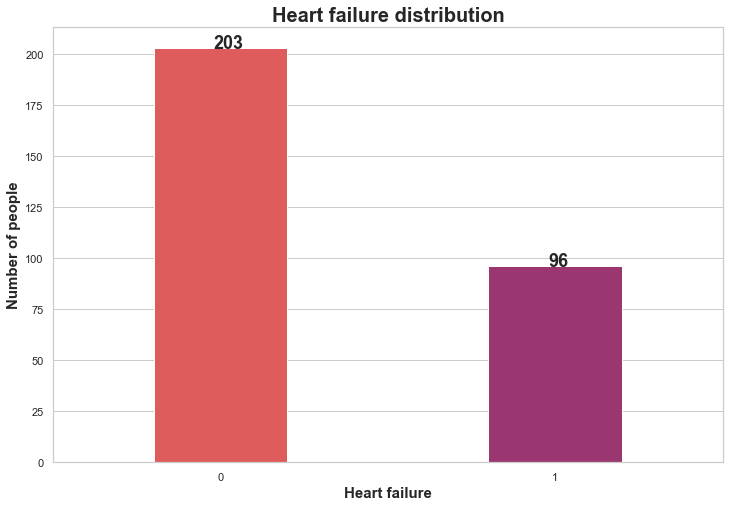

In [17]:
plt.figure(figsize=(12,8))
plt.title("Heart failure distribution",fontsize=20,fontweight = "bold")
sns.set_theme(style="whitegrid")

ax = sns.countplot(x="DEATH_EVENT",data=df,palette='flare', saturation =2.5)
plt.xlabel("Heart failure", fontsize = 15,fontweight = "bold")
plt.ylabel("People",fontsize=15, fontweight = "bold")

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+.38, p.get_height()),fontsize = 18, fontweight = "bold")
    
def change_width(ax, new_value):
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        patch.set_width(new_value)

        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .4)
    
ax.set(ylabel = 'Number of people')
plt.show()

### Kategoryzacja zmiennych

In [63]:
bins = [0, 49.99, 59.99, 69.99, 79.99, 95]
labels = ['40-Y-Olders','50-Y-Olders','60-Y-Olders', '70-Y-Olders', 'over 80']
df['age range'] = pd.cut(df['age'], bins=bins, labels=labels)

pd.DataFrame(df['age range'].value_counts())

,age range
60-Y-Olders,93
50-Y-Olders,82
70-Y-Olders,52
40-Y-Olders,47
over 80,25


In [64]:
df['time range'] = round(df['time']/30.5,2)

bins = [0, 2.99, 5.99, 7.99, 15]
labels = ['0-3 months','3-6 months','6-8 months', 'over 8 months']

df['time range in months'] = pd.cut(df['time range'], bins=bins, labels=labels)
pd.DataFrame(df['time range in months'].value_counts())

,time range in months
0-3 months,116
3-6 months,80
6-8 months,71
over 8 months,32


In [80]:
bins = [0, 149999, 399999, 1000000]
labels= ['below the norm', 'normal level', 'above the norm']

df['platelets range'] = pd.cut(df['platelets'],bins=bins, labels=labels)
pd.DataFrame(df['platelets range'].value_counts())

,platelets range
normal level,252
below the norm,27
above the norm,20


In [81]:
bins = [0, 194.99, 10000]
labels= ['normal level', 'above the norm']

df['creatinine phosphokinase range'] = pd.cut(df['creatinine_phosphokinase'], bins=bins, labels=labels)
pd.DataFrame(df['creatinine phosphokinase range'].value_counts())

,creatinine phosphokinase range
above the norm,174
normal level,125


In [82]:
bins = [0, 1.3, 100]
labels= ['normal level', 'above the norm']

df['serum creatinine range'] = pd.cut(df['serum_creatinine'], bins=bins, labels=labels)
pd.DataFrame(df['serum creatinine range'].value_counts())

,serum creatinine range
normal level,218
above the norm,81


In [101]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'time_range', 'time range in months', 'time range',
       'age range', 'platelets range', 'creatinine phosphokinase range',
       'serum creatinine range'],
      dtype='object')

### Rozkład wszystkich zmiennych w zależności od zmiennej celu

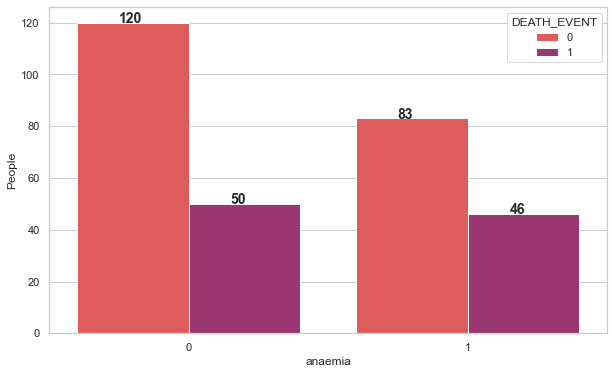

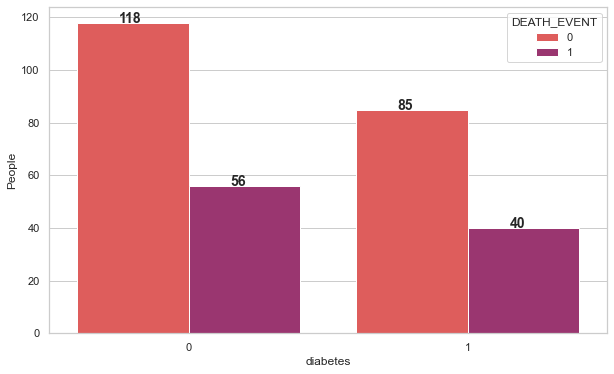

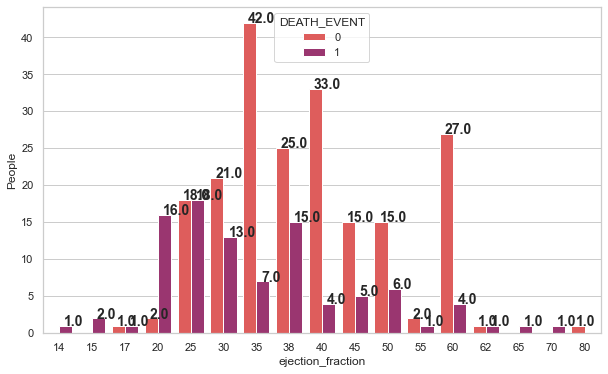

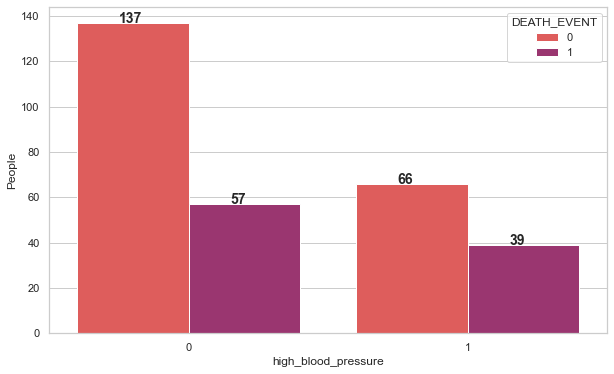

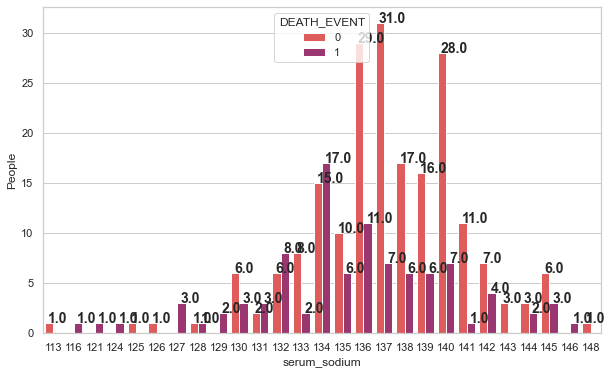

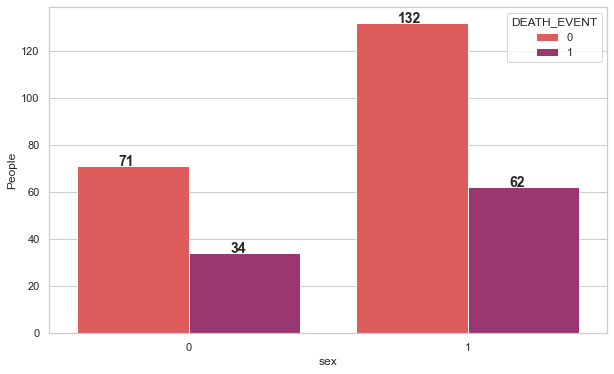

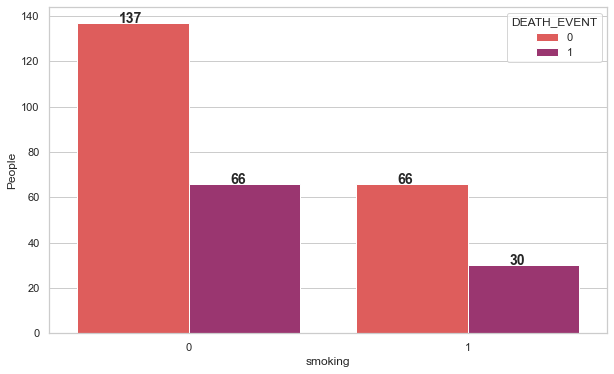

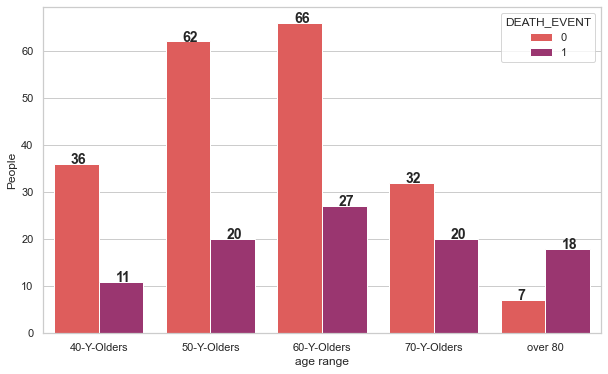

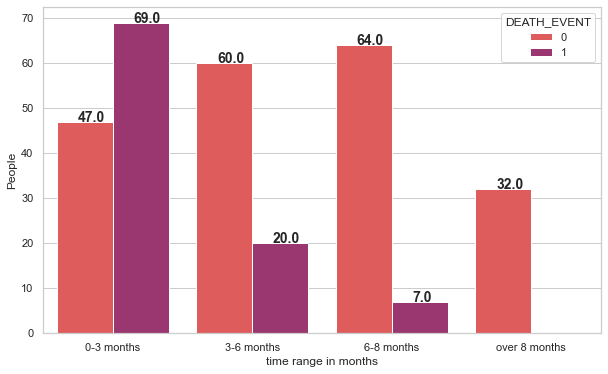

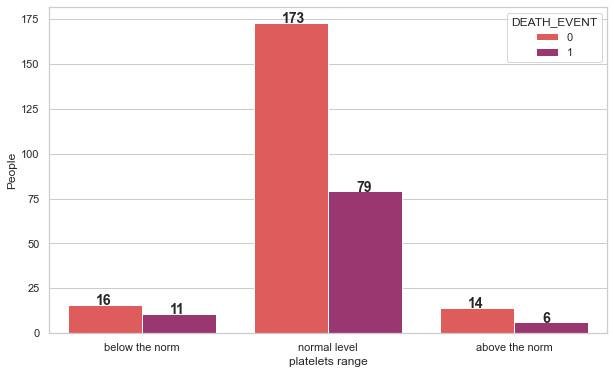

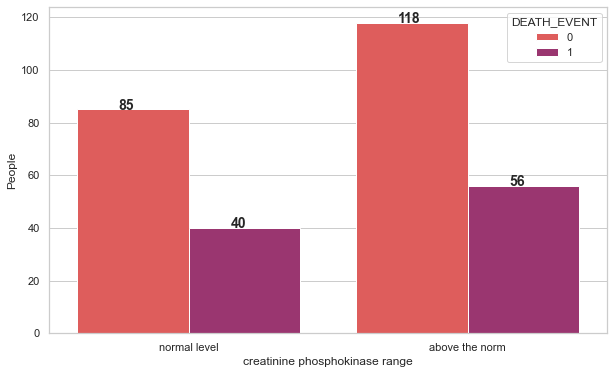

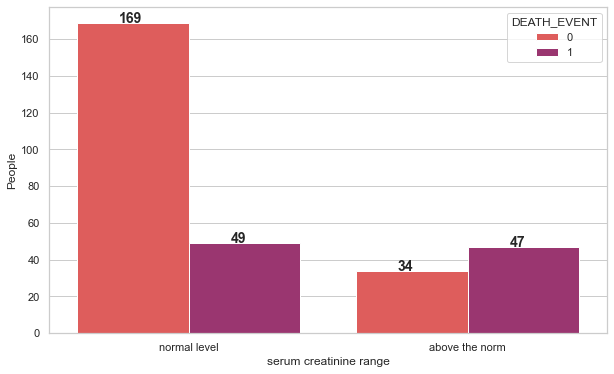

In [102]:
columns3 = df[['anaemia','diabetes','ejection_fraction', 'high_blood_pressure', 'serum_sodium', 'sex', 'smoking','age range','time range in months','platelets range','creatinine phosphokinase range','serum creatinine range']]

for col in columns3:
    plt.figure(figsize=(10,6))
    sns.set_theme(style="whitegrid")
    ax = sns.countplot(x=col, data=columns3, palette='flare',hue=df['DEATH_EVENT'], saturation =2.5)
    for p in ax.patches:
            ax.annotate('{}'.format(p.get_height()), (p.get_x()+.15, p.get_height()), fontsize=14, fontweight = "bold")
    ax.set(ylabel='People')

### Wykresy gęstości dla wybranych zmiennych

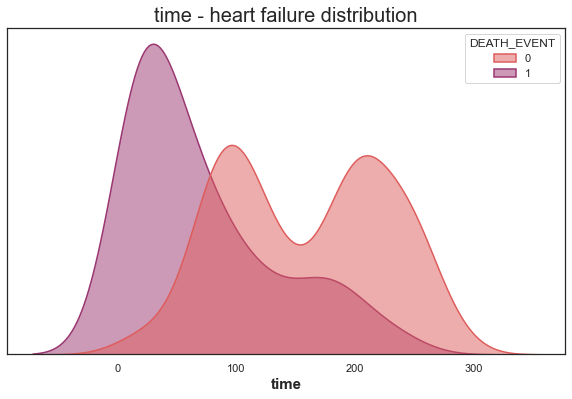

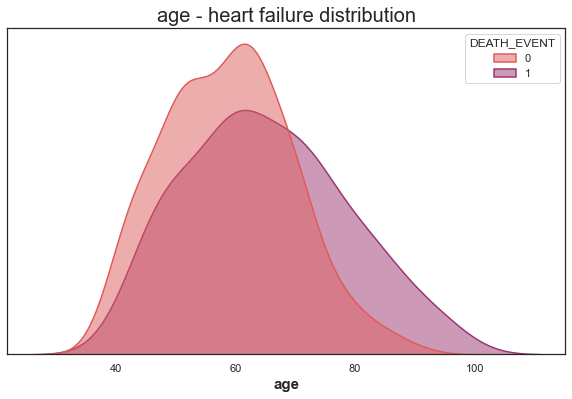

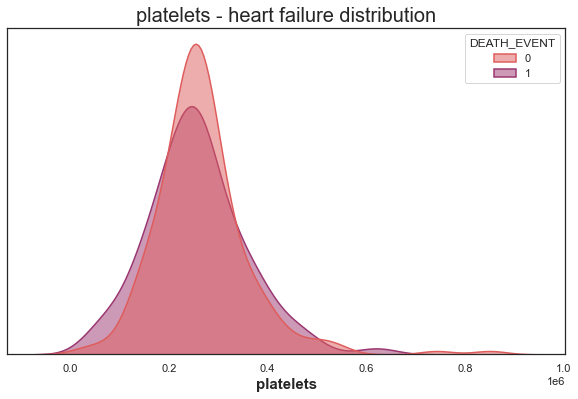

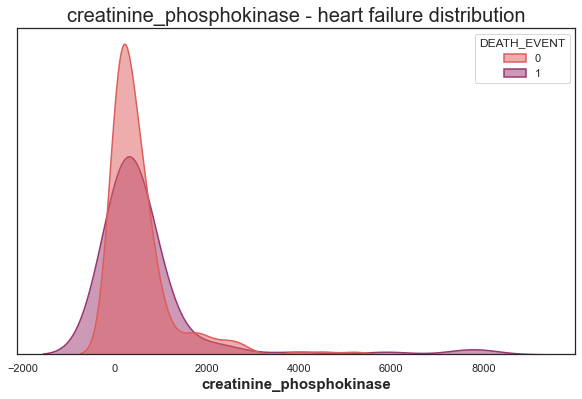

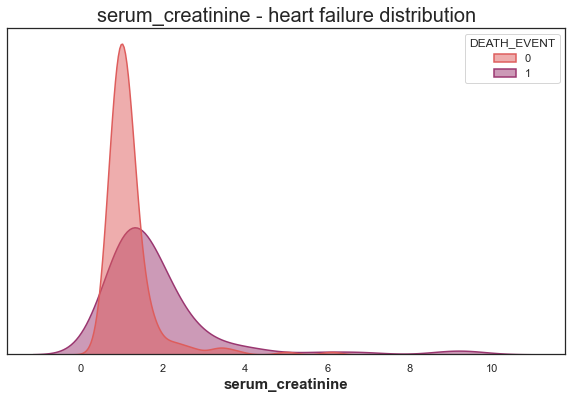

In [100]:
columns1= df[['time', 'age', 'platelets','creatinine_phosphokinase', 'serum_creatinine']]

for col in columns1:
    plt.figure(figsize = (10,6))
    sns.set_theme(style="white")
    ax = sns.kdeplot(data=columns1, x=columns1[col], hue=df['DEATH_EVENT'], fill=True, common_norm=False, palette="flare", alpha=.5, linewidth=1.5)
    ax.set(yticklabels=[])
    ax.set(ylabel=None) 
    ax.tick_params(left=False)
    plt.xlabel(xlabel=col,fontsize=15,fontweight = "bold")
    plt.title(('{} - heart failure distribution'.format(col)),fontsize=20)
    plt.show()

### Wykresy procentowe dla wybranych zmiennych

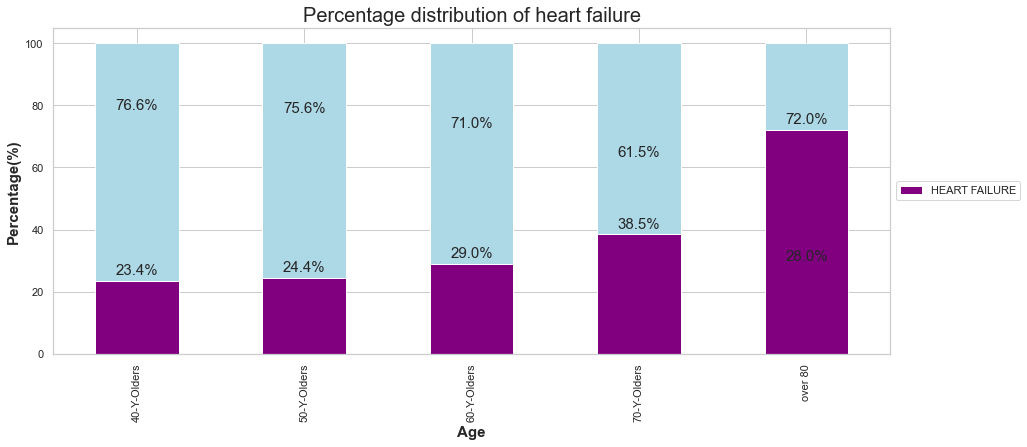

In [94]:
age_type_plik = pd.crosstab(df['age range'], df['DEATH_EVENT'] == 0)

stacked_data_weight = age_type_plik.apply(lambda x: x/sum(x)*100, axis=1)

sns.set_theme(style="whitegrid")
ax = stacked_data_weight.plot(kind="bar",stacked=True, figsize = (15,6), color= ("purple", "lightblue"))
plt.title("Percentage distribution of heart failure",fontsize=20)
plt.xlabel("Age", fontsize = 15, fontweight = "bold")
plt.ylabel("Percentage(%)", fontsize = 15, fontweight = "bold")
ax.legend(['HEART FAILURE'],loc='center left', bbox_to_anchor=(1, 0.5))

for p in ax.patches:
    percentage = "{0:0.1f}%".format(p.get_height())
    x = p.get_x() + 0.25 
    y = p.get_height() +2
    ax.annotate(percentage, (x,y), ha = "center", fontsize = 15)

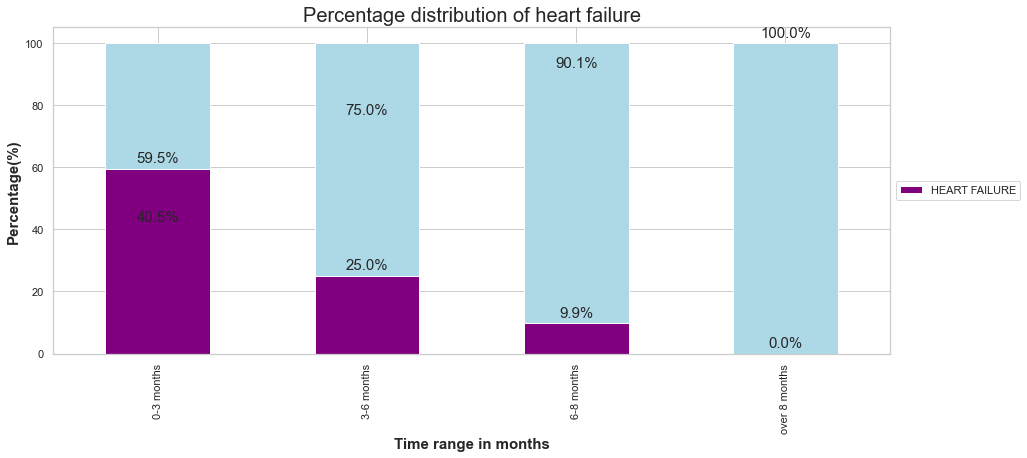

In [95]:
time_type_plik = pd.crosstab(df['time range in months'], df['DEATH_EVENT'] == 0)

stacked_data_weight = time_type_plik.apply(lambda x: x/sum(x)*100, axis=1)

sns.set_theme(style="whitegrid")
ax = stacked_data_weight.plot(kind="bar",stacked=True, figsize = (15,6), color= ("purple", "lightblue"))
plt.title("Percentage distribution of heart failure",fontsize=20)
plt.xlabel("Time range in months", fontsize = 15, fontweight = "bold")
plt.ylabel("Percentage(%)", fontsize = 15, fontweight = "bold")
ax.legend(['HEART FAILURE'],loc='center left', bbox_to_anchor=(1, 0.5))

for p in ax.patches:
    percentage = "{0:0.1f}%".format(p.get_height())
    x = p.get_x() + 0.25 
    y = p.get_height() +2
    ax.annotate(percentage, (x,y), ha = "center", fontsize = 15)

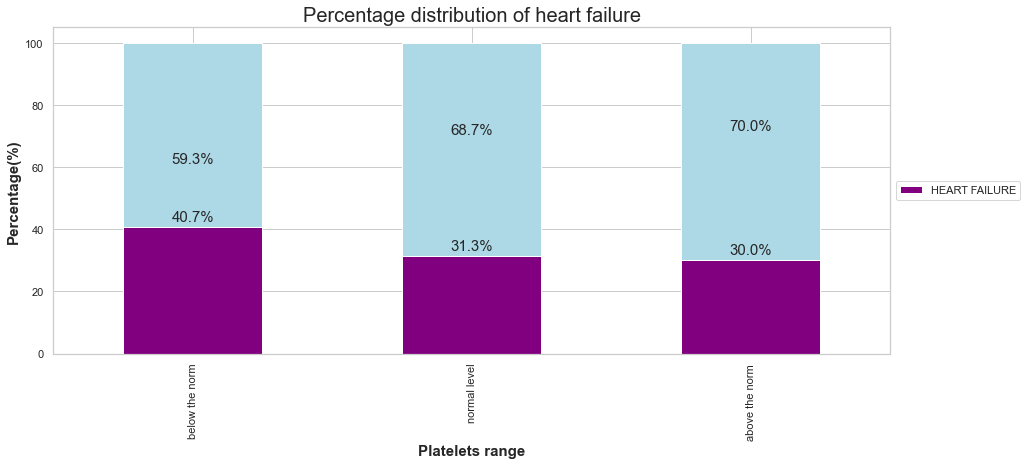

In [96]:
platelets_type_plik = pd.crosstab(df['platelets range'], df['DEATH_EVENT'] == 0)

stacked_data_weight = platelets_type_plik.apply(lambda x: x/sum(x)*100, axis=1)

sns.set_theme(style="whitegrid")
ax = stacked_data_weight.plot(kind="bar",stacked=True, figsize = (15,6), color= ("purple", "lightblue"))
plt.title("Percentage distribution of heart failure",fontsize=20)
plt.xlabel("Platelets range", fontsize = 15, fontweight = "bold")
plt.ylabel("Percentage(%)", fontsize = 15, fontweight = "bold")
ax.legend(['HEART FAILURE'],loc='center left', bbox_to_anchor=(1, 0.5))

for p in ax.patches:
    percentage = "{0:0.1f}%".format(p.get_height())
    x = p.get_x() + 0.25 
    y = p.get_height() +2
    ax.annotate(percentage, (x,y), ha = "center", fontsize = 15)

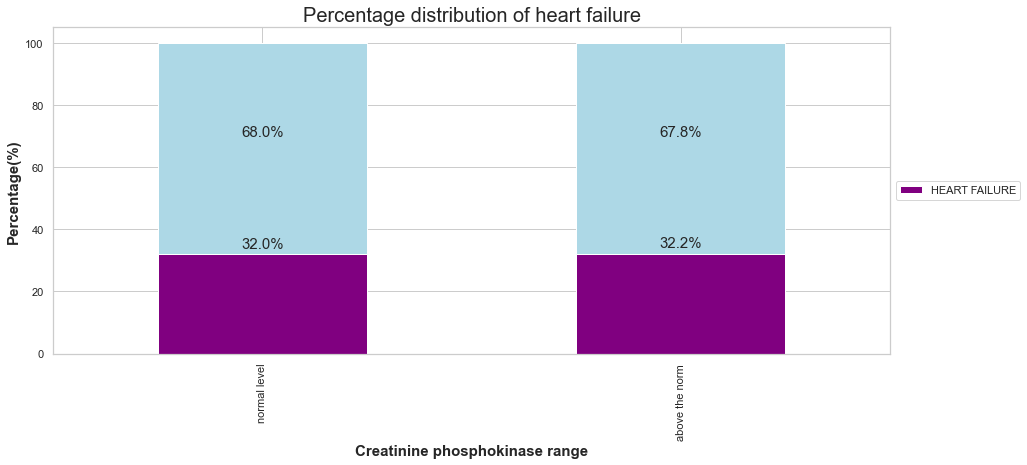

In [97]:
phosphokinase_type_plik = pd.crosstab(df['creatinine phosphokinase range'], df['DEATH_EVENT'] == 0)

stacked_data_weight = phosphokinase_type_plik.apply(lambda x: x/sum(x)*100, axis=1)

sns.set_theme(style="whitegrid")
ax = stacked_data_weight.plot(kind="bar",stacked=True, figsize = (15,6), color= ("purple", "lightblue"))
plt.title("Percentage distribution of heart failure",fontsize=20)
plt.xlabel("Creatinine phosphokinase range", fontsize = 15, fontweight = "bold")
plt.ylabel("Percentage(%)", fontsize = 15, fontweight = "bold")
ax.legend(['HEART FAILURE'],loc='center left', bbox_to_anchor=(1, 0.5))

for p in ax.patches:
    percentage = "{0:0.1f}%".format(p.get_height())
    x = p.get_x() + 0.25 
    y = p.get_height() +2
    ax.annotate(percentage, (x,y), ha = "center", fontsize = 15)

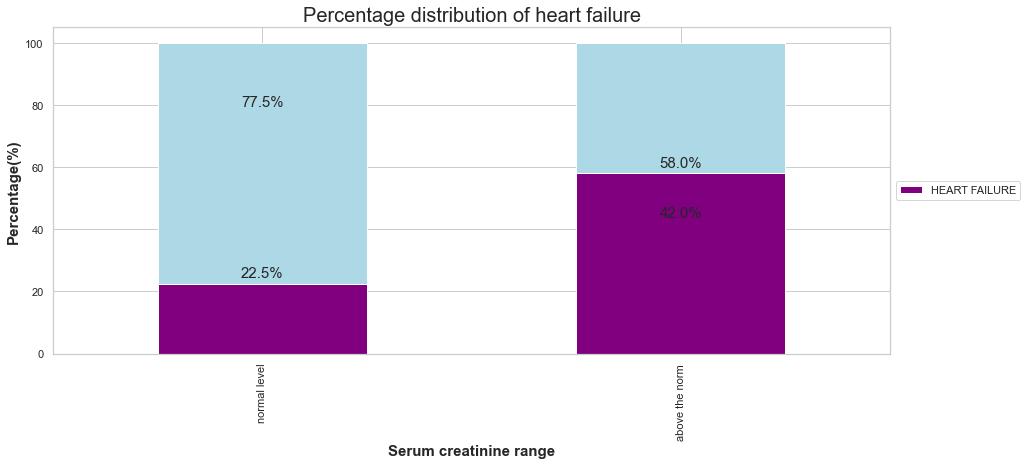

In [98]:
serum_creatinine_type_plik = pd.crosstab(df['serum creatinine range'], df['DEATH_EVENT'] == 0)

stacked_data_weight = serum_creatinine_type_plik.apply(lambda x: x/sum(x)*100, axis=1)

sns.set_theme(style="whitegrid")
ax = stacked_data_weight.plot(kind="bar",stacked=True, figsize = (15,6), color= ("purple", "lightblue"))
plt.title("Percentage distribution of heart failure",fontsize=20)
plt.xlabel("Serum creatinine range", fontsize = 15, fontweight = "bold")
plt.ylabel("Percentage(%)", fontsize = 15, fontweight = "bold")
ax.legend(['HEART FAILURE'],loc='center left', bbox_to_anchor=(1, 0.5))

for p in ax.patches:
    percentage = "{0:0.1f}%".format(p.get_height())
    x = p.get_x() + 0.25 
    y = p.get_height() +2
    ax.annotate(percentage, (x,y), ha = "center", fontsize = 15)